# Heuristic Analysis

In this analysis report, we analyze results of the three heuristics that were developed for the Isolation Game Agent project.  The process that is illustrated below performs the following actions for each heuristic:
- Extract the Win ratio results from 10 test runs that was captured in the log file that was generated during the simulation runs
- Combine the data into a Dataframe for analysis and visualization

We complete the report by giving a recommendation based on the analysis performed.  Below are a few helper functions that are used throughout the analysis process.

In [8]:
import re
import pandas as pd
%matplotlib inline

def extract_results(filename):
    with open(filename,'r') as rf:
        lines = rf.readlines()
        id_results = [line for i,line in enumerate(lines) if i % 4 == 1 ]
        student_results = [line for i,line in enumerate(lines) if i % 4 == 3 ]
        return id_results,student_results

def get_win_ratios(l):
    tmp = []
    for line in l:
        score = re.compile(r'(ID_Improved|Student):([0-9\.]+).*')
        m = score.match(line)
        if m:
            tmp.append(m.group(2))
    return tmp

def build_dict(filename):
    id_results,student_results = extract_results(filename)
    id_results = get_win_ratios(id_results)
    student_results = get_win_ratios(student_results)
    ids = [i for i in range(1,11)]
    df = {'Test Run': ids, 'ID_Improved':id_results, 'Student':student_results}
    return df

## Hueristic 1: Number of Overlapping moves

For this heuristic, we calculate the number of overlapping moves that our agent has in common with our opponent.  The intuition here was that if there are moves that both the agents can take in the future, we want to try to eliminate those options from our opponent, reducing the number of legal moves they would have in the future.



In [17]:
d = build_dict('overlapping_results.log')
df3 = pd.DataFrame(d)
df3['Heuristic'] = 'overlapping'
df3['ID_Improved'] = pd.to_numeric(df3['ID_Improved'])
df3['Student'] = pd.to_numeric(df3['Student'])
df3[['ID_Improved','Student']].describe()

,ID_Improved,Student
count,10.000000,10.000000
mean,41.785714,41.214286
std,2.842223,3.883946
min,37.857143,34.285714
25%,39.285714,38.928571
50%,42.500000,41.785714
75%,43.928571,44.285714
max,45.714286,46.428571


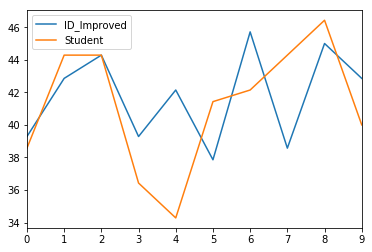

In [13]:
df3[['ID_Improved','Student']].plot()

We can see our overlapping heuristic performed worst on average than the iterative deeping improved heuristic.  This doesn't seem to be a good approach and possibly it may be more beneficial looking at the number of non-overlapping moves.

## Heuristic 2: Number of Non Overlapping Moves

This heuristic calculates the number of non-overlapping moves that it has with its opponent.  The intuition here is that if the player has more moves that are not in conflict with its opponent, it has more options to choose from and possibly covering board space that the opponent is not interested in exploring or cannot reach

In [20]:
d = build_dict('non_overlapping_results.log')
df2 = pd.DataFrame(d)
df2['Heuristic'] = 'non_overlapping'
df2['ID_Improved'] = pd.to_numeric(df2['ID_Improved'])
df2['Student'] = pd.to_numeric(df2['Student'])
df2[['ID_Improved','Student']].describe()

,ID_Improved,Student
count,10.000000,10.000000
mean,42.428571,72.714286
std,3.144300,2.124258
min,38.571429,70.000000
25%,40.714286,70.892857
50%,41.785714,72.857143
75%,44.642857,74.642857
max,48.571429,75.714286


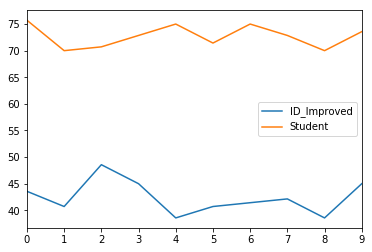

In [11]:
df2[['ID_Improved','Student']].plot()

We can see there is an 30% increase in improvement over the iterative deepening agent.  It's worth noting that this technique seems to have small standard deviation from the mean value.  Based on these trial runs, it would seem that this heuristic performs consisently through multiple simulation runs.

## Heuristic 3: Number of Blank Spaces along Vertical split

This heuristic calculates the number of blank spaces that are on the same side as the current location relative to a vertical pivot point at the midpoint of the board.  The intuition here is that if there are more blank spaces on the same side as the current location, then the player has more spaces in the future to move.  Since we are choosing the most optimal move for our opponent, then the number of blank spaces is a good indicator for our game agent. 

In [23]:
d = build_dict('blank_space_results.log')
df1 = pd.DataFrame(d)
df1['Heuristic'] = 'blank space'
df1['ID_Improved'] = pd.to_numeric(df1['ID_Improved'])
df1['Student'] = pd.to_numeric(df1['Student'])
df1[['ID_Improved','Student']].describe()

,ID_Improved,Student
count,10.000000,10.000000
mean,41.571429,78.285714
std,4.065786,3.502510
min,35.714286,73.571429
25%,38.571429,76.071429
50%,41.785714,77.857143
75%,45.357143,79.464286
max,46.428571,85.000000


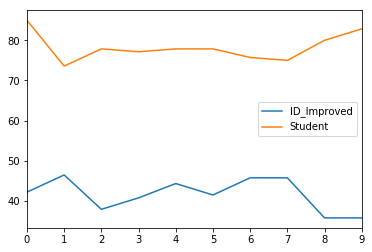

In [9]:
df1[['ID_Improved','Student']].plot()

We can see that this heuristic performs the best with a 37% increase which is almost a 2X improvement over the iterative deepening heuristic.  This heuristic at a minimum performs better than the average performance of the non overlapping heuristic.  It also worth noting that this heuristic captured a win ratio of 85% which is pretty impressive for a simple heuristic approach.

Below we illustrate a table of the raw values of all the simulation runs captured during this analysis.

In [14]:
df = pd.concat([df1,df2,df3])
df

,ID_Improved,Student,Test Run,Heuristic
0,42.142857,85.000000,1,blank space
1,46.428571,73.571429,2,blank space
2,37.857143,77.857143,3,blank space
3,40.714286,77.142857,4,blank space
4,44.285714,77.857143,5,blank space
5,41.428571,77.857143,6,blank space
6,45.714286,75.714286,7,blank space
7,45.714286,75.000000,8,blank space
8,35.714286,80.000000,9,blank space
9,35.714286,82.857143,10,blank space


## Recommendation

I would recommend the **blank spaces** heuristic as it is shown to be a simple yet powerful heuristic. The simplicity of its implementation allows for it to be computed efficiently so that more time can be used for searching and exploring other branches within the search tree.  At a minimum it has shown to give a 73% win ratio and its best performance was shown to be 85% is a 2X improvement over the average itertive deepening heuristic approach.  It has also been shown to have a small standard deviation therefore we can expect consistent results across multiple simulation runs.